In [1]:
import numpy as np
import pandas as pd

import spacy

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec, FastText

from sklearn.manifold import TSNE

from os import walk, system, path
import re

## Resumen
En este nootebook probamos con dos liberiras diferentes para hacer el preprocesamiento. NLTK y SpaCy y a su vez porbamos con ds modelos de word-embeding distintos word2vec y FastText.

El objetivo es agrupar los diferrerntes tipos de entidades que existan en el documento. Identificar laborartorios, tratamientos y cientificos

In [2]:
corpus_path = '../Files/project-corpus/'
file_texts = []
for (dirpath, dirnames, filenames) in walk(corpus_path):
  files = [ path.join(dirpath, filename) for filename in filenames if filename[-3:] == 'txt']
  for file_name in files:
    try:
      with open(file_name, 'r', encoding='utf-8') as file:
        file_texts.append(file.read())
    except:
      print(f'file {file_name} could not be opened')

file_texts = pd.Series(file_texts)
file_texts

0      ﻿BioScience Trends. 2020; 14(1):64-68.\n\nBrie...
1      ﻿\nstatistical analysis plan for a recursive t...
2      Role of GS-5734 (Remdesivir) in inhibiting SAR...
3      IFN-I response timing relative to virus replic...
4      Small-Molecule Antiviral ␤-D-N4-Hydroxycytidin...
                             ...                        
110    ﻿Journal of Infection 80 (2020) 394–400\n\nCon...
111    ﻿Int. J. Biol. Sci. 2020, Vol. 16\n\nIvyspring...
112    Teicoplanin: an alternative drug for the treat...
113    ﻿The epidemiology and pathogenesis of coronavi...
114    Inevitable isolation and the change\nof stress...
Length: 115, dtype: object

# NLTK

In [3]:
reg = re.compile(r'[A-Za-z\.,\'\s-]+')
porter_stemmer = PorterStemmer()

def preprocessing_nltk(doc):
    document = doc.lower()
    document = ' '.join(reg.findall(document))
    tokens = word_tokenize(document)
    tokens = [porter_stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    return tokens

norm_corpus = file_texts.apply(preprocessing_nltk)
norm_corpus

0      [bioscienc, trend, ., -, ., brief, report, doi...
1      [statist, analysi, plan, recurs, twostag, grou...
2      [role, gs-, remdesivir, inhibit, sars-cov, mer...
3      [ifn-i, respons, time, rel, viru, replic, dete...
4      [small-molecul, antivir, -d-n, -hydroxycytidin...
                             ...                        
110    [journal, infect, content, list, avail, scienc...
111    [int, ., j., biol, ., sci, ., ,, vol, ., ivysp...
112    [teicoplanin, altern, drug, treatment, covid-,...
113    [epidemiolog, pathogenesi, coronaviru, diseas,...
114    [inevit, isol, chang, stress, marker, hemodial...
Length: 115, dtype: object

## Word2Vec

In [4]:
model_1 = Word2Vec(norm_corpus, size=100, window=5, min_count=1, workers=4)
model_1

In [5]:
model_1.similar_by_vector('arbidol', topn=10)

[('c', 0.9986426830291748),
 ('biolog', 0.998627781867981),
 ('vitro', 0.9985527396202087),
 ('interferon', 0.9985367059707642),
 ('cell', 0.9985266923904419),
 ('activ', 0.9985154867172241),
 ('studi', 0.9985126256942749),
 ('ifn', 0.9985077381134033),
 ('lpv', 0.9984957575798035),
 ('p', 0.9984825849533081)]

In [6]:
model_1.similar_by_vector('interferon', topn=10)

[('ifn', 0.9998905062675476),
 ('function', 0.9998578429222107),
 ('ga', 0.9998554587364197),
 ('show', 0.9998528957366943),
 ('activ', 0.9998475909233093),
 ('cell', 0.9998412132263184),
 ('rdv', 0.9998298287391663),
 ('vitro', 0.9998272657394409),
 ('p', 0.9998142719268799),
 ('fig', 0.9998116493225098)]

In [7]:
(
  model_1.similarity('drug', 'interferon'),
  model_1.similarity('arbidol', 'interferon'),
  model_1.similarity('shanghai', 'interferon'),
  model_1.similarity('shanghai', 'arbidol'),
)

(0.99916965, 0.9985368, 0.99571544, 0.99535006)

## FastText

In [8]:
model_2 = FastText(sentences=norm_corpus, size=100, window=5, min_count=1, workers=4)  # instantiate
model_2

In [9]:
model_2.similar_by_vector('drug', topn=10)

[('antibodymedi', 0.9996920824050903),
 ('ifn-i', 0.9996914267539978),
 ('antibody-medi', 0.9996827840805054),
 ('ef', 0.9996546506881714),
 ('ifn-', 0.9996461868286133),
 ('anti-apn', 0.9995386004447937),
 ('anticip', 0.9995299577713013),
 ('anti-il-', 0.9995173215866089),
 ('anti-', 0.9995099306106567),
 ('ftir', 0.9994762539863586)]

In [10]:
model_1.similar_by_vector('interferon', topn=10)

[('ifn', 0.9998905062675476),
 ('function', 0.9998578429222107),
 ('ga', 0.9998554587364197),
 ('show', 0.9998528957366943),
 ('activ', 0.9998475909233093),
 ('cell', 0.9998412132263184),
 ('rdv', 0.9998298287391663),
 ('vitro', 0.9998272657394409),
 ('p', 0.9998142719268799),
 ('fig', 0.9998116493225098)]

In [11]:
model_2.similar_by_vector('shanghai', topn=10)

[('bshanghai', 0.9999886751174927),
 ('taiwan', 0.9999381303787231),
 ('mediterranean', 0.9999260306358337),
 ('medmal-', 0.9999238848686218),
 ('median', 0.9999175071716309),
 ('med', 0.9999150037765503),
 ('union', 0.999905526638031),
 ('media', 0.9999048709869385),
 ('guangd', 0.9999029636383057),
 ('radic', 0.9999029040336609)]

In [12]:
(
  model_2.similarity('arbidol', 'interferon'),
  model_2.similarity('shanghai', 'interferon'),
  model_2.similarity('shanghai', 'arbidol'),
)

(0.99951637, 0.998786, 0.9974288)

## SpaCy

In [13]:
nlp = spacy.load("en_core_web_lg")

In [14]:
spacy_text = file_texts.apply(nlp)
spacy_text = spacy_text.to_frame()
spacy_text.columns = ['spacy_txt']
spacy_text

,spacy_txt
0,"(﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,..."
1,"(﻿, \n, statistical, analysis, plan, for, a, r..."
2,"(Role, of, GS-5734, (, Remdesivir, ), in, inhi..."
3,"(IFN, -, I, response, timing, relative, to, vi..."
4,"(Small, -, Molecule, Antiviral, ␤, -D, -, N4-H..."
...,...
110,"(﻿Journal, of, Infection, 80, (, 2020, ), 394–..."
111,"(﻿Int, ., J., Biol, ., Sci, ., 2020, ,, Vol, ...."
112,"(Teicoplanin, :, an, alternative, drug, for, t..."
113,"(﻿The, epidemiology, and, pathogenesis, of, co..."


In [15]:
def preprocessing_spacy(spacy_doc):
    return [ token.lemma_.lower() for token in spacy_doc 
        if not token.is_stop and not token.is_space and not token.is_punct
    ]
spacy_text['clean_text'] = spacy_text.spacy_txt.apply(preprocessing_spacy)
spacy_text

,spacy_txt,clean_text
0,"(﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,...","[﻿bioscience, trends, 2020, 14(1):64, 68, brie..."
1,"(﻿, \n, statistical, analysis, plan, for, a, r...","[﻿, statistical, analysis, plan, recursive, tw..."
2,"(Role, of, GS-5734, (, Remdesivir, ), in, inhi...","[role, gs-5734, remdesivir, inhibit, sars, cov..."
3,"(IFN, -, I, response, timing, relative, to, vi...","[ifn, response, timing, relative, virus, repli..."
4,"(Small, -, Molecule, Antiviral, ␤, -D, -, N4-H...","[small, molecule, antiviral, ␤, -d, n4-hydroxy..."
...,...,...
110,"(﻿Journal, of, Infection, 80, (, 2020, ), 394–...","[﻿journal, infection, 80, 2020, 394–400, conte..."
111,"(﻿Int, ., J., Biol, ., Sci, ., 2020, ,, Vol, ....","[﻿int, j., biol, sci, 2020, vol, 16, ivyspring..."
112,"(Teicoplanin, :, an, alternative, drug, for, t...","[teicoplanin, alternative, drug, treatment, co..."
113,"(﻿The, epidemiology, and, pathogenesis, of, co...","[﻿the, epidemiology, pathogenesis, coronavirus..."


## word2Vec

In [16]:
model_3 = Word2Vec(spacy_text['clean_text'], size=100, window=3, min_count=1, workers=4)
model_3

In [17]:
model_3.similar_by_vector('arbidol', topn=10)

[('healthcare', 0.9982941150665283),
 ('12', 0.9982447624206543),
 ('fcov', 0.9982243180274963),
 ('11', 0.9982145428657532),
 ('d', 0.9982104897499084),
 ('year', 0.9981898069381714),
 ('important', 0.9981815814971924),
 ('india', 0.9981814622879028),
 ('level', 0.9981741309165955),
 ('10', 0.9981558918952942)]

In [18]:
model_3.similar_by_vector('shanghai', topn=10)

[('chinese', 0.9988734722137451),
 ('medicine', 0.9988494515419006),
 ('beijing', 0.9988417029380798),
 ('university', 0.998834490776062),
 ('center', 0.9988207817077637),
 ('medical', 0.9988183975219727),
 ('college', 0.9988178014755249),
 ('department', 0.9988027811050415),
 ('national', 0.9987967610359192),
 ('sciences', 0.9987356662750244)]

In [19]:
model_3.similar_by_vector('interferon', topn=10)

[('cell', 0.9998589754104614),
 ('assay', 0.9998555183410645),
 ('increase', 0.9998517632484436),
 ('test', 0.9998449683189392),
 ('effect', 0.9998418092727661),
 ('c', 0.999841570854187),
 ('study', 0.9998381733894348),
 ('potential', 0.9998286962509155),
 ('article', 0.9998247027397156),
 ('ifn', 0.999821126461029)]

In [20]:
(
  model_3.similarity('drug', 'interferon'),
  model_3.similarity('drug', 'arbidol'),
  model_3.similarity('arbidol', 'interferon'),
  model_3.similarity('interferon', 'article'),
)

(0.9996786, 0.9977972, 0.99808526, 0.99982464)

## FastText

In [21]:
model_4 = FastText(sentences=spacy_text['clean_text'], size=100, window=5, min_count=1, workers=4)  # instantiate
model_4

In [22]:
model_4.similar_by_vector('arbidol', topn=10)

[('centrale', 0.999964714050293),
 ('interesting', 0.9999631643295288),
 ('inevitable', 0.999962568283081),
 ('indispensability', 0.9999613761901855),
 ('terheggen', 0.9999609589576721),
 ('particle', 0.9999606609344482),
 ('ccr2-mediate', 0.9999601244926453),
 ('immunologist', 0.9999595880508423),
 ('metropolis', 0.9999594688415527),
 ('training', 0.9999591708183289)]

In [23]:
model_4.similar_by_vector('shanghai', topn=10)

[('bshanghai', 0.9999828934669495),
 ('taiwan', 0.9999732971191406),
 ('hospital', 0.9999537467956543),
 ('beijing', 0.9999473690986633),
 ('guangzhou', 0.9999421834945679),
 ('diversity', 0.9999399185180664),
 ('universitätsstrasse', 0.9999375343322754),
 ('chinese', 0.9999372363090515),
 ('schiff', 0.9999364614486694),
 ('machine', 0.9999354481697083)]

In [24]:
model_4.similar_by_vector('interferon', topn=10)

[('interleukin', 0.999991238117218),
 ('positive', 0.9999865293502808),
 ('integr', 0.9999864101409912),
 ('interferons', 0.999984860420227),
 ('interface', 0.999984622001648),
 ('interim', 0.9999845027923584),
 ('negative', 0.9999839067459106),
 ('indicative', 0.9999837875366211),
 ('interpret11', 0.9999836683273315),
 ('hypertension', 0.9999836683273315)]

In [25]:
(
  model_4.similarity('drug', 'interferon'),
  model_4.similarity('arbidol', 'interferon'),
  model_4.similarity('shanghai', 'interferon'),
  model_4.similarity('shanghai', 'arbidol'),
  model_4.similarity('arbidol', 'mers'),
)

(0.99953294, 0.99930763, 0.99960136, 0.99915504, 0.97722197)

# Entities

In [26]:
spacy_text.spacy_txt.head()

0    (﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,...
1    (﻿, \n, statistical, analysis, plan, for, a, r...
2    (Role, of, GS-5734, (, Remdesivir, ), in, inhi...
3    (IFN, -, I, response, timing, relative, to, vi...
4    (Small, -, Molecule, Antiviral, ␤, -D, -, N4-H...
Name: spacy_txt, dtype: object

In [27]:
entities = pd.DataFrame(
  spacy_text.spacy_txt
  .apply(lambda doc: doc.ents)
  .apply(pd.Series)
  .values
  .reshape(-1),
  columns=['entitie']
).dropna()
entities['label'] = entities.entitie.apply(lambda ent: ent.label_)
entities['text'] = entities.entitie.apply(lambda ent: ent.text.lower())

entities = entities[
    entities.label.isin(['ORG', 'LAW', 'PERSON', 'WORK_OF_ART', 'PRODUCT'])
    & (entities.text.str.len() > 3)
].reset_index(drop=True)
entities

,entitie,label,text
0,"(﻿BioScience, Trends)",ORG,﻿bioscience trends
1,(Xiaorong),PERSON,xiaorong
2,(Yunfei),PERSON,yunfei
3,"(Feifei, Chen3)",ORG,feifei chen3
4,"(Wei, Zhang3)",PERSON,wei zhang3
...,...,...,...
4124,(MERS),PERSON,mers
4125,(MERS),PERSON,mers
4126,"(National, Disaster, Management)",ORG,national disaster management
4127,"(MERS, -, CoV)",ORG,mers-cov


In [28]:
entities[['text', 'label']].to_csv('../Files/project_entities.csv')

# Clustering 

In [29]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

samples = entities[
    entities.text.str.contains('interf')
    | entities.text.str.contains('tonavir')
]
samples[['text', 'label']].head()

,text,label
14,lopinavir/ritonavir,ORG
17,lopinavir/ritonavir,ORG
29,interferon-β1b,LAW
30,lopinavir/ritonavir,ORG
35,lopinavir/ritonavir,ORG


## Modelo 1 - (NLTK, word2vec)

2,3,4,5,6,7,8,9,10,11,12,13,14,

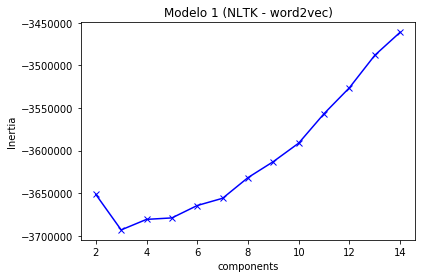

In [30]:
def ent_vector(ent):
    tokens = preprocessing_nltk(ent.text)
    vectors = np.array([model_1[t] for t in tokens if t in model_1])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_1 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_1.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_1.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

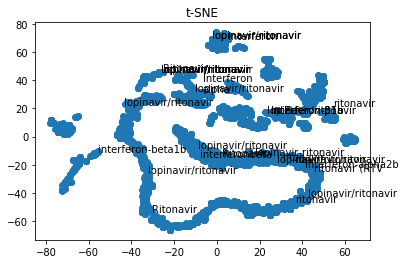

In [31]:
tsne = TSNE(n_components=2).fit_transform(vectors_1)
pca = PCA(n_components=2).fit_transform(vectors_1)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 2 - (NLTK, fastText)

2,3,4,5,6,7,8,9,10,11,12,13,14,

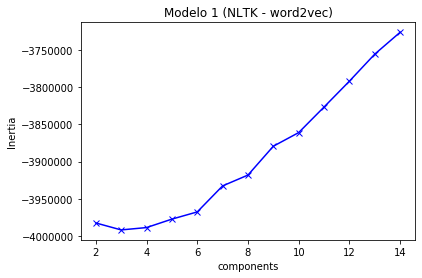

In [32]:
def ent_vector(ent):
    tokens = preprocessing_nltk(ent.text)
    vectors = np.array([model_2[t] for t in tokens if t in model_2])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_2 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_2.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_2.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

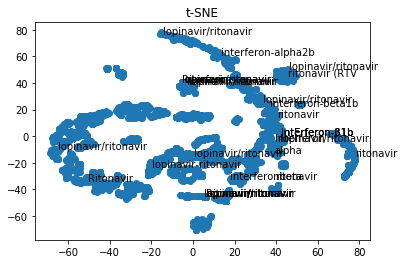

In [33]:
tsne = TSNE(n_components=2).fit_transform(vectors_2)
pca = PCA(n_components=2).fit_transform(vectors_2)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 3 - (spacy, word2vec)

2,3,4,5,6,7,8,9,10,11,12,13,14,

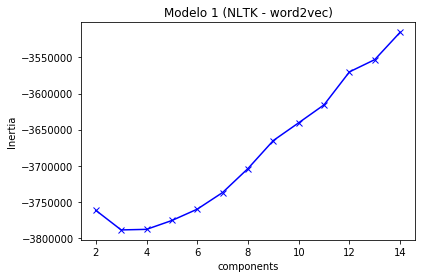

In [34]:
def ent_vector(ent):
    tokens = preprocessing_spacy(ent)
    vectors = np.array([model_3[t] for t in tokens if t in model_3])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_3 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_3.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_3.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

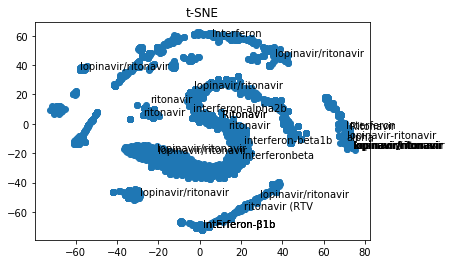

In [35]:
tsne = TSNE(n_components=2).fit_transform(vectors_3)
pca = PCA(n_components=2).fit_transform(vectors_3)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 4 - (spacy, fastText)

2,3,4,5,6,7,8,9,10,11,12,13,14,

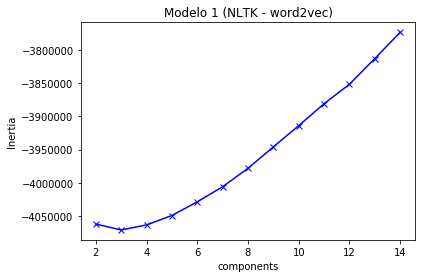

In [36]:
def ent_vector(ent):
    tokens = preprocessing_spacy(ent)
    vectors = np.array([model_4[t] for t in tokens if t in model_4])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_4 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_4.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_4.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

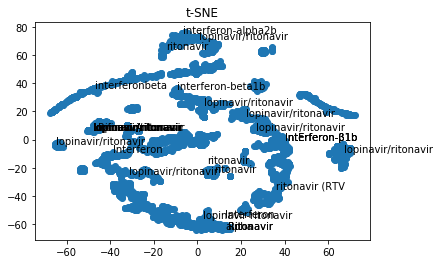

In [37]:
tsne = TSNE(n_components=2).fit_transform(vectors_4)
pca = PCA(n_components=2).fit_transform(vectors_4)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

# Resultados clusterring
## modelo 1

In [38]:
entities['labels_1'] = None
entities['labels_2'] = None
entities['labels_3'] = None
entities['labels_4'] = None

In [39]:
gm_1 = GaussianMixture(n_components=4)
entities['labels_1'].loc[vectors_1.index] = gm_1.fit_predict(vectors_1)
gm_2 = GaussianMixture(n_components=4)
entities['labels_2'].loc[vectors_2.index] = gm_2.fit_predict(vectors_2)
gm_3 = GaussianMixture(n_components=4)
entities['labels_3'].loc[vectors_3.index] = gm_3.fit_predict(vectors_3)
gm_4 = GaussianMixture(n_components=4)
entities['labels_4'].loc[vectors_4.index] = gm_4.fit_predict(vectors_4)

In [40]:
entities[['text', 'labels_1', 'labels_2', 'labels_3', 'labels_4']].to_csv('../Files/clustering_resutls.csv')

In [41]:
class_prob = gm_3.predict_proba(vectors_3)

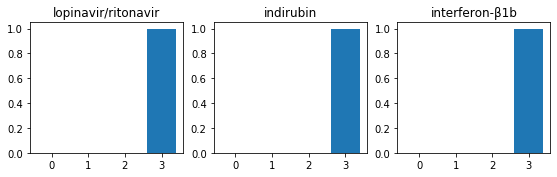

In [44]:
samples = [17, 1099, 29]

plt.figure(figsize=[6.4*len(samples), 4.8/2])

for i, s in enumerate(samples):
    plt.subplot(130+i+1 + (len(samples) * 10))
    plt.title(entities.text.iloc[s])
    plt.bar(range(4), class_prob[s])

plt.show()

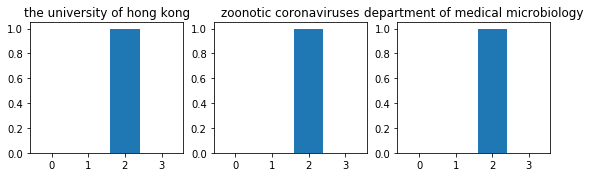

In [47]:
samples = [465, 537, 638]

plt.figure(figsize=[6.4*len(samples), 4.8/2])

for i, s in enumerate(samples):
    plt.subplot(130+i+1 + (len(samples) * 10))
    plt.title(entities.text.iloc[s])
    plt.bar(range(4), class_prob[s])

plt.show()

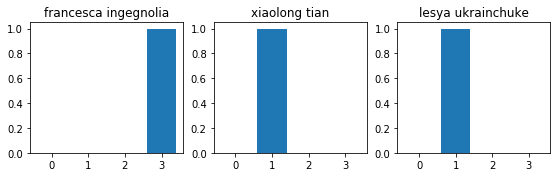

In [52]:
samples = [699, 3027, 3549]

plt.figure(figsize=[6.4*len(samples), 4.8/2])

for i, s in enumerate(samples):
    plt.subplot(130+i+1 + (len(samples) * 10))
    plt.title(entities.text.iloc[s])
    plt.bar(range(4), class_prob[s])

plt.show()

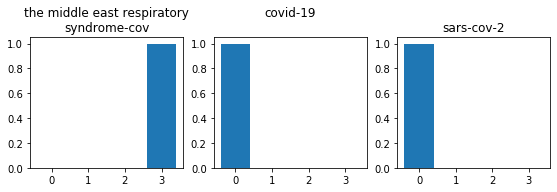

In [54]:
samples = [1980, 228, 319]

plt.figure(figsize=[6.4*len(samples), 4.8/2])

for i, s in enumerate(samples):
    plt.subplot(130+i+1 + (len(samples) * 10))
    plt.title(entities.text.iloc[s])
    plt.bar(range(4), class_prob[s])

plt.show()

In [58]:
import pickle

pickle.dump(gm_1, open('model_1/gm.sklearn', 'wb'))
pickle.dump(gm_2, open('model_2/gm.sklearn', 'wb'))
pickle.dump(gm_3, open('model_3/gm.sklearn', 'wb'))
pickle.dump(gm_4, open('model_4/gm.sklearn', 'wb'))

model_1.save('model_1/embedings_model.genism')
model_2.save('model_2/embedings_model.genism')
model_3.save('model_3/embedings_model.genism')
model_4.save('model_4/embedings_model.genism')